In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
from scipy.special import comb, gamma

from scipy import stats

%config InlineBackend.scale = "retina"
az.style.use("arviz-darkgrid")

In [19]:
p = pd.DataFrame.from_dict({
    "A": [0,0,10,0,0], 
    "B": [0,1,8,1,0], 
    "C": [0,2,6,2,0],
    "D": [1,2,4,2,1],
    "E": [2,2,2,2,2]
})
p_norm = p / p.sum(0)

In [20]:
def entropy(q):
    return -np.sum([0 if x == 0 else x*np.log(x) for x in q])

H = p_norm.apply(entropy, axis=0)
H

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64

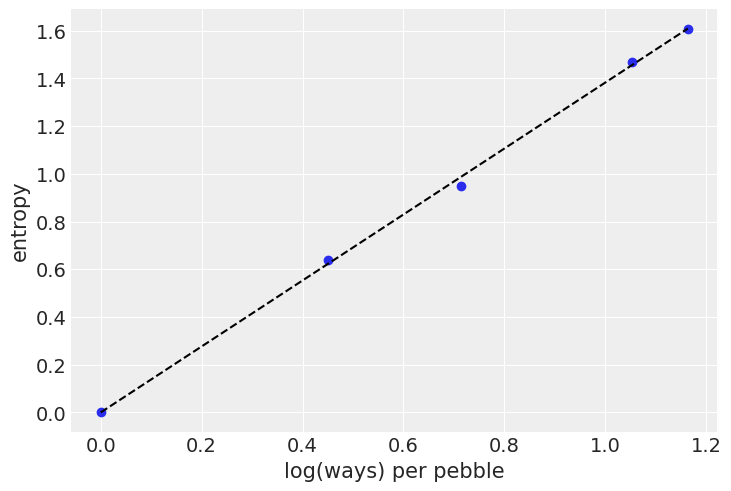

In [34]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways)/10
plt.scatter(logwayspp, H)
plt.plot([0, max(logwayspp)], [0, max(H)], "--k")
plt.xlabel("log(ways) per pebble")
plt.ylabel("entropy");

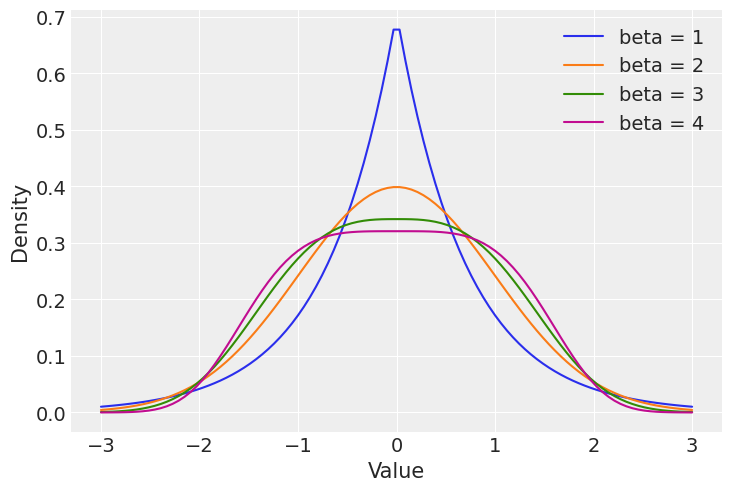

In [113]:
x = np.linspace(-3, 3, 100)
beta = [1, 2, 3, 4]
y = np.zeros((100, 4))
for i, b in enumerate(beta):
    y[:, i] = stats.gennorm.pdf(x, b, 0, np.sqrt(gamma(1/b)/gamma(3/b)))
    plt.plot(x, y[:, i], label="beta = {}".format(b))
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(loc="upper right");

1.999


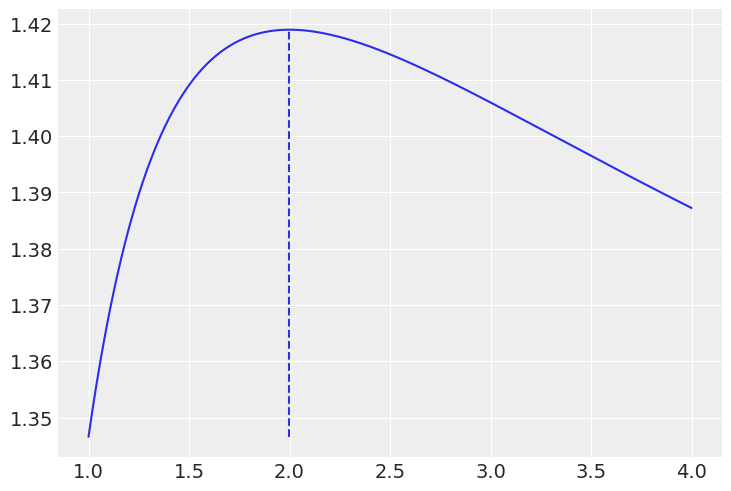

In [123]:
beta = np.linspace(1, 4, 1000)
H = stats.gennorm.entropy(beta, scale=np.sqrt(gamma(1/beta) / gamma(3/beta)))
plt.plot(beta, H)
plt.vlines(1 + np.argmax(H)*3/1000, H.min(), H.max(), linestyles="--")
print(1 + np.argmax(H)*3/1000)